In [14]:
import pandas as pd
import seaborn as sns

In [7]:
test_df = pd.read_csv('Star3642_balanced.csv')
train_df = pd.read_csv('Star39552_balanced.csv')

In [9]:
print(train_df.shape, test_df.shape)

(39552, 7) (3642, 7)


In [22]:
train_df.drop('SpType', axis = 'columns', inplace = True)
test_df.drop('SpType', axis = 'columns', inplace = True)

In [23]:
train_df.head(3)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,10.00,31.66,6.19,1.213,22.502556,1
1,8.26,3.21,1.00,1.130,15.792525,0
2,8.27,12.75,1.06,0.596,18.797552,1


In [24]:
test_df.head(3)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,5.99,13.73,0.58,1.318,16.678352,0
1,8.70,2.31,1.29,-0.045,15.518060,0
2,5.77,5.50,1.03,0.855,14.471813,0


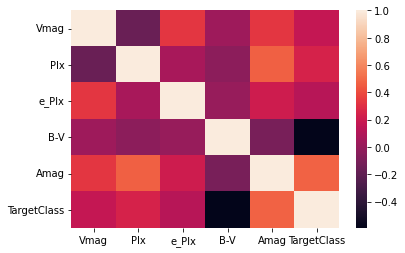

In [25]:
sns.heatmap(train_df.corr())

In [37]:
x_train = train_df.drop('TargetClass', axis = 'columns')
y_train = train_df['TargetClass']
x_test = test_df.drop('TargetClass', axis = 'columns')
y_test = test_df['TargetClass']

In [27]:
x_train.head()

,Vmag,Plx,e_Plx,B-V,Amag
0,10.00,31.66,6.19,1.213,22.502556
1,8.26,3.21,1.00,1.130,15.792525
2,8.27,12.75,1.06,0.596,18.797552
3,6.54,5.23,0.76,1.189,15.132508
4,8.52,0.96,0.72,0.173,13.431356


In [28]:
x_train.isna().sum()

Vmag     0
Plx      0
e_Plx    0
B-V      0
Amag     0
dtype: int64

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
model = GaussianNB()

In [39]:
model.fit(x_train, y_train)

GaussianNB()

In [40]:
model.score(x_test, y_test)

0.8358045030203185

In [41]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm = confusion_matrix(y_test, model.predict(x_test))

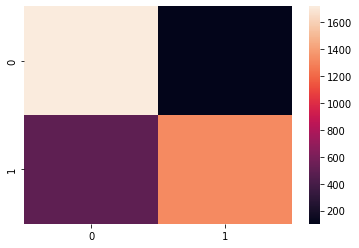

In [45]:
sns.heatmap(cm)